In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
# how many data-points and features
print(iris.shape)

(150, 5)


In [4]:
# what are the column names in our dataset
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# how many data points/ observations for each class 
#(or) how many flowers for each species are present?
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

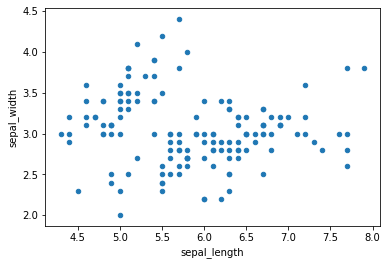

In [7]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.show()

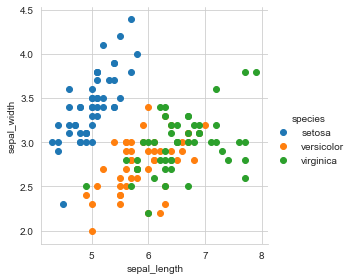

In [8]:
# 2-D scatter plot with color-coding for each flower type/class
sns.set_style("whitegrid")
(
    sns.FacetGrid(iris, hue='species',height=4)
        .map(plt.scatter, 'sepal_length', 'sepal_width')
        .add_legend()
)
plt.show()

#notice that the blue points belonging to the setosa class can be easily separated.
# whereas versicolor and virginica are much harder to distinguish 

### Observations:
 1) Using sepal_length and sepal_width features,we can distinguish Setosa flowers from others.
 
 2) Separating Versicolor from Virginica is much harder as they have considerable overlap.

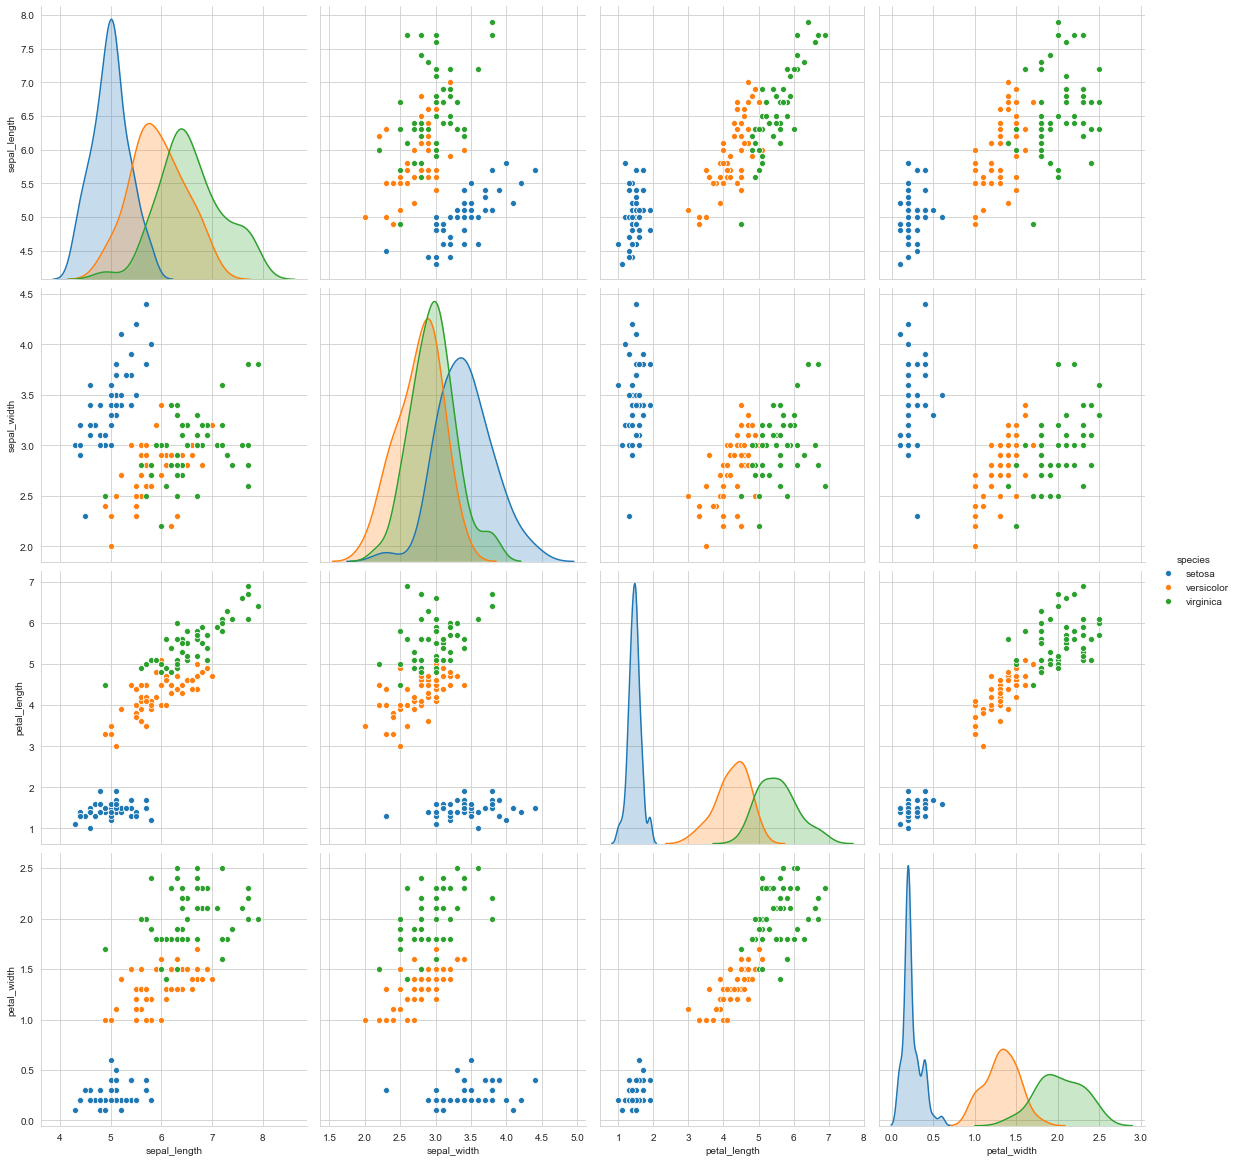

In [9]:
# using pair-plot to identify the best features for distinguish between flower types.
plt.close()
sns.set_style("whitegrid")
sns.pairplot(iris, hue='species', height=4)
plt.show()

### Observations:
1)petal_length and petal_width are the most useful features to identify various flower types.

2)Setosa can be easily identified, whereas Virginca and Versicolor have some overlap.

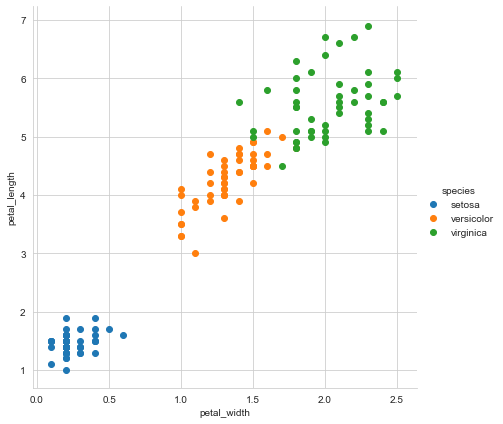

In [10]:
(
    sns.FacetGrid(iris, hue='species', height=6)
        .map(plt.scatter, "petal_width", "petal_length")
        .add_legend()
)
plt.show()

In [11]:
# creating 3 new dataframes basesd on the flower type
iris_setosa = iris[iris["species"]=="setosa"]
iris_virginica = iris[iris["species"]=="virginica"]
iris_versicolor = iris[iris["species"]=="versicolor"]

In [12]:
print(iris_virginica.head())

     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica
103           6.3          2.9           5.6          1.8  virginica
104           6.5          3.0           5.8          2.2  virginica


#### Univariate Analysis:
The better way to visualize one dimension will be PDF.
Finding out which feature will be the more suitable to distinguish the flower type.

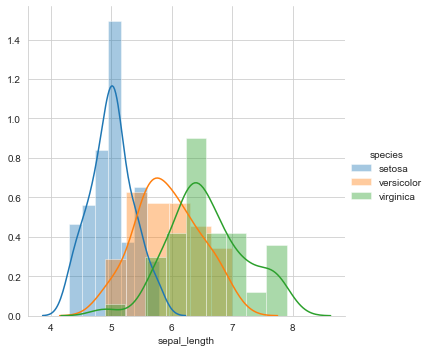

In [13]:
# PDF of the each variable using hue
(
    sns.FacetGrid(iris, hue="species", height=5)
        .map(sns.distplot, "sepal_length")
        .add_legend()
)
plt.show()


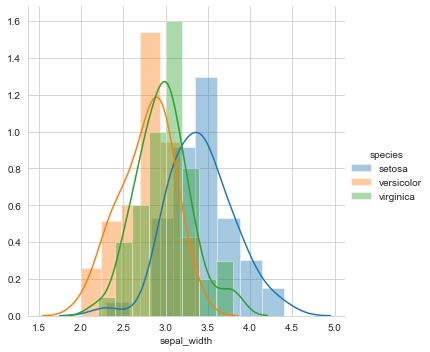

In [14]:
(
    sns.FacetGrid(iris, hue="species", height=5)
        .map(sns.distplot, "sepal_width")
        .add_legend()
)
plt.show()

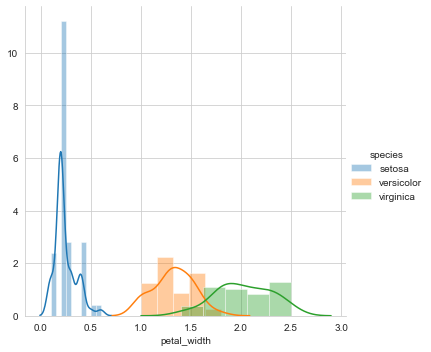

In [15]:
(
    sns.FacetGrid(iris, hue="species", height=5)
        .map(sns.distplot, "petal_width")
        .add_legend()
)
plt.show()

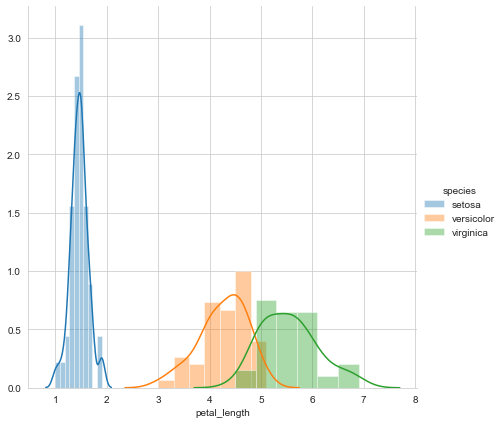

In [16]:
(
    sns.FacetGrid(iris, hue="species", height=6)
        .map(sns.distplot, "petal_length")
        .add_legend()
)
plt.show()

### Observation:
1) Among the 4 PDF "petal_length" is the most Useful.

2) Using just this one feature we could conclude that is the petal_length < 2.4 then it is SETOSA flower.

3) The versicolour petal_length are mostly below 5 but we need CDF for clearer picture.

4) to determine what percentage of versicolour petal length is below 5

In [17]:
np.histogram(iris_setosa['petal_length'], bins=15, density= True)

(array([0.33333333, 0.33333333, 0.        , 0.66666667, 0.        ,
        2.33333333, 4.        , 0.        , 4.66666667, 0.        ,
        2.33333333, 1.33333333, 0.        , 0.        , 0.66666667]),
 array([1.  , 1.06, 1.12, 1.18, 1.24, 1.3 , 1.36, 1.42, 1.48, 1.54, 1.6 ,
        1.66, 1.72, 1.78, 1.84, 1.9 ]))

In [18]:
np.histogram(iris_setosa['petal_length'], bins=15, density= False)

(array([ 1,  1,  0,  2,  0,  7, 12,  0, 14,  0,  7,  4,  0,  0,  2],
       dtype=int64),
 array([1.  , 1.06, 1.12, 1.18, 1.24, 1.3 , 1.36, 1.42, 1.48, 1.54, 1.6 ,
        1.66, 1.72, 1.78, 1.84, 1.9 ]))

In [19]:
# Using the histogram to calculate PDF and then CDF 
# np.histogram returns two array 1) no. of samples per bin 2) bin edges

counts, bin_edges = np.histogram(iris_setosa["petal_length"], bins = 10, density=True)
# computing PDF
pdf = counts/sum(counts)

print("PDF values-->",pdf)
print("bin_edges-->",bin_edges)

#computing CDF 
cdf = np.cumsum(pdf)

PDF values--> [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
bin_edges--> [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


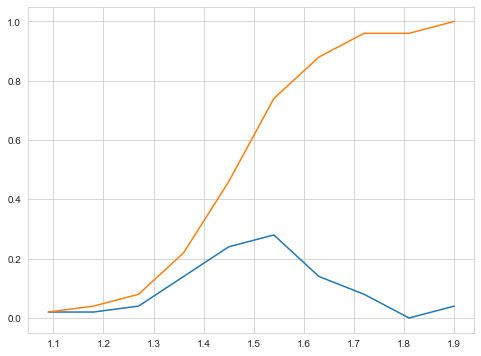

In [20]:
# the no. of bins=10 but bin_edges=11 therefore to plot correctly omit the very first bin_edge
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

#### We can conclude from the CDF plot that the petal length of all setosa flower are well below 2 cm

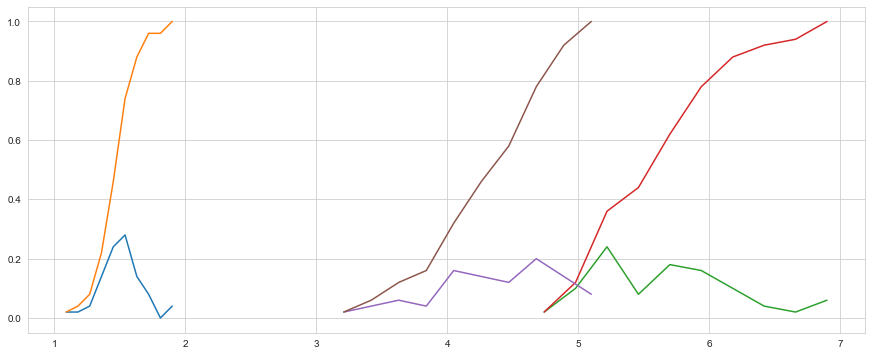

In [21]:
# Now using the np.histogram we will calculate PDF and CDF of petal_length of all flower types

# 1) Setosa:
counts, bin_edges = np.histogram(iris_setosa["petal_length"], bins=10, density=True)
pdf = counts/sum(counts)

cdf = np.cumsum(pdf)

plt.figure(figsize=(15,6))

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# 2) Virginica
counts, bin_edges = np.histogram(iris_virginica["petal_length"], bins=10, density=True)
pdf = counts/sum(counts)

cdf = np.cumsum(pdf)


plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# 3) Versicolor
counts, bin_edges = np.histogram(iris_versicolor["petal_length"], bins=10, density=True)
pdf = counts/sum(counts)

cdf = np.cumsum(pdf)


plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

###### Now we can see that petal length of all versicolor flower are below 5.2 cm  
###### and there are only few virginica whose petal length are below 5.2cm

In [22]:
# Using median, percentile, Quantile, IQR & MAD to dig deep into the data
# we are using median because it is less affected by the outliers

# median
print("Medians:\n")
print("Setosa",np.median(iris_setosa['petal_length']))
print("Versicolor",np.median(iris_versicolor['petal_length']))
print("Virginica",np.median(iris_virginica['petal_length']))

Medians:

Setosa 1.5
Versicolor 4.35
Virginica 5.55


In [23]:
np.arange(0, 100, 25)

array([ 0, 25, 50, 75])

In [24]:
print("Quantiles:\n")

print("Setosa      ",np.percentile(iris_setosa['petal_length'], np.arange(0, 100, 25)))
print("Versicolor  ",np.percentile(iris_versicolor['petal_length'], np.arange(0, 100, 25)))
print("Virginica   ",np.percentile(iris_virginica['petal_length'], np.arange(0, 100, 25)))

Quantiles:

Setosa       [1.    1.4   1.5   1.575]
Versicolor   [3.   4.   4.35 4.6 ]
Virginica    [4.5   5.1   5.55  5.875]


In [25]:
# the uncertainity about versicolor and virginica can be removed by 95th percentile
print("95th Percentile:\n")
print("Setosa  ",np.percentile(iris_setosa['petal_length'], 95))
print("Versicolor  ",np.percentile(iris_versicolor['petal_length'], 95))
print("Virginica  ",np.percentile(iris_virginica['petal_length'], 95))

95th Percentile:

Setosa   1.7
Versicolor   4.9
Virginica   6.654999999999999


##### This shows that 95 percent of versicolor have petal length less than 4.9 cm

In [26]:
# Now we will find out what percent of Virginica flower have petal length less than 5.05cm
print("Virginca  ",np.percentile(iris_virginica['petal_length'], 10))

Virginca   4.9


###### Here we can conclude that if the petal length is less than 4.9 cm than we are 95% confident it is Versicolor 

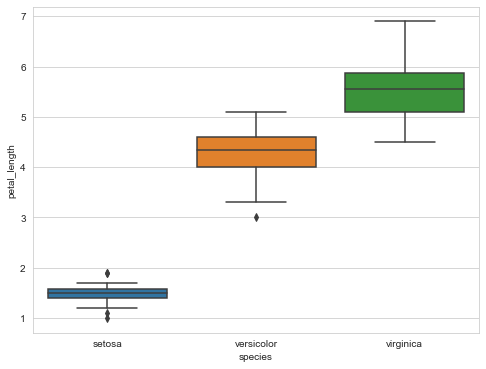

In [27]:
#using box plot to visualize petal length more intuitvely
plt.figure(figsize=(8,6))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.show()

In [28]:

# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# use jitter=True so that all the points don't fall in single vertical lines
# above the species




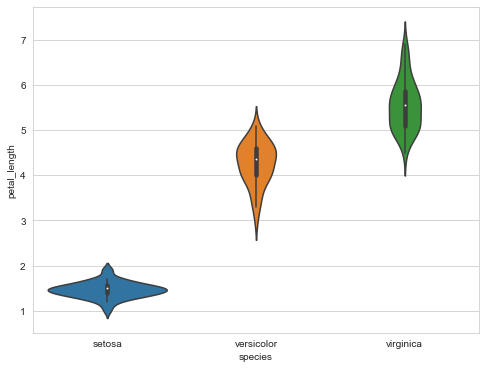

In [29]:
# violin plots:
plt.figure(figsize=(8,6))
sns.violinplot(x='species', y='petal_length', data=iris, height=10)
plt.show()

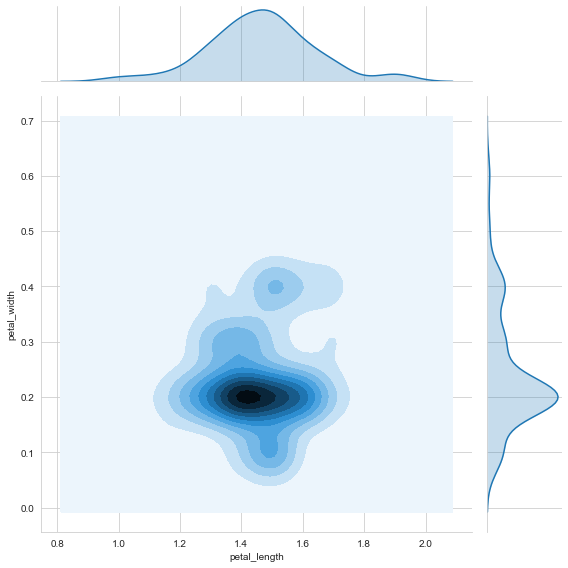

In [30]:
# 2D Density plot, contors-plot

sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind='kde', height=8)
plt.show()